<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

## San Francisco Data

---

[San Francisco provides a wealth of data on the city to the public.](https://data.sfgov.org/) 

Project 3 is all about modelling exploring this data and modeling interesting relationships with regression. 


---

## Notes on the data

We have gone through the above website and pulled out a variety of different datasets that we think are particularly interesting. Some of the datasets are from external sources as well, but all are related to San Francisco. A high level overview of data folders is provided after the project requirements section.

** Feel free to include any other datasets from the San Francisco data if you think there is relevance or if it could be useful for your analysis.**


**The uncompressed data is a large filesize.** Even the compressed data is pretty large. The data is compressed into a .7z format which has one of the smallest filesizes available. You will likely need a 3rd party app to extract it. 

### Recommended Utilities for .7z
- For OSX [Keka](http://www.kekaosx.com/en/) or [The Unarchiver](http://wakaba.c3.cx/s/apps/unarchiver.html). 
- For Windows [7-zip](http://www.7-zip.org/) is the standard. 
- For Linux try the `p7zip` utility.  `sudo apt-get install p7zip`.

---

## Project requirements

**You will be performing 4 different sections of analysis on the San Francisco data.**

**Models must be regression. This means that your target variable needs to be numeric/continuous**

Do not perform classification models – this will be the topic of week 4.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 1. Use the San Francisco assessor dataset and perform EDA

---

1. Explain what the data is. This may include multiple csv files. Some of this data has hard to understand codes representing the variables. Nearly all data is pulled from https://data.sfgov.org/ so this is a very good resource for determining what the data is.
- Clean the data.
- Develop and state clearly a hypothesis about the data that you would want to test.(This is totally upto you)
- Create some initial visualizations on the portions of the data relevant to your hypothesis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline
%config

Available objects for config:
     ZMQInteractiveShell
     HistoryManager
     PrefilterManager
     IPCompleter
     DisplayFormatter
     MagicsManager
     ScriptMagics
     AliasManager
     IPKernelApp
     StoreMagics
     StoreMagics
     InlineBackend


In [2]:
file_path = '/Users/keatoncarano/Desktop/dsi-sf-7-materials-Keaton/datasets/sf_assessor_value/assessor_value_cleaned.csv'

#y_07_08 = pd.read_csv(file_path+'/assessor_data_2007_2008.csv', dtype='object')
#y_08_09 = pd.read_csv(file_path+'/assessor_data_2008_2009.csv', dtype='object')
#y_09_10 = pd.read_csv(file_path+'/assessor_data_2009_2010.csv', dtype='object')
#y_10_11 = pd.read_csv(file_path+'/assessor_data_2010_2011.csv', dtype='object')
#y_11_12 = pd.read_csv(file_path+'/assessor_data_2011_2012.csv', dtype='object')
#y_12_13 = pd.read_csv(file_path+'/assessor_data_2012_2013.csv', dtype='object')
#y_13_14 = pd.read_csv(file_path+'/assessor_data_2013_2014.csv', dtype='object')
#y_14_15 = pd.read_csv(file_path+'/assessor_data_2014_2015.csv', dtype='object')



In [3]:
#'/Users/keatoncarano/Desktop/dsi-sf-7-materials-Keaton/datasets/sf_assessor_value/assessor_value_cleaned.csv'


In [4]:
#frames = [y_07_08, y_08_09, y_09_10, y_10_11, y_11_12, y_12_13, y_13_14, y_14_15]
result = pd.read_csv(file_path)
key_file = '/Users/keatoncarano/Desktop/dsi-sf-7-materials-Keaton/datasets/san_francisco/san_francisco/assessor_office/assessor_neighborhood_key.csv'

key = pd.read_csv(key_file)
key.head()

,DISTRICT,CODE,NEIGHBORHOOD,BOUNDRIES
0,1,1A,Central Richmond,"South of California, Park Presidio, south of F..."
1,1,1B,Inner Richmond,"South of California, Arguello, south of Fulton..."
2,1,1C,Jordan Park/Laurel Heights,"California, west of Presidio, Geary, Arguello"
3,1,1D,Lake --The Presidio,"West and south of Presidio Terrace, Arguello, ..."
4,1,1E,Outer Richmond,"The Ocean, west of 32nd Avenue, south of Fulton"


In [5]:
result.head()

,baths,beds,lot_depth,basement_area,front_ft,owner_pct,rooms,property_class,neighborhood,tax_rate,volume,sqft,stories,year_recorded,year_built,zone,value
0,2,2,0.0,0.0,0.0,1.00000,5,Z,08E,1000.0,1,1419,0,2007,1907,RH3,1002840.0
1,2,2,0.0,0.0,0.0,1.00000,7,Z,08E,1000.0,1,1773,0,2007,1907,RH3,1433430.0
2,2,2,0.0,0.0,0.0,1.00000,5,Z,08E,1000.0,1,1242,0,2007,1995,C2,485599.0
3,1,0,0.0,0.0,0.0,0.33333,6,D,08E,1000.0,1,1820,1,2007,1927,RH3,120826.0
4,1,0,0.0,0.0,0.0,1.00000,4,D,08E,1000.0,1,1020,1,2007,1926,RH3,988380.0


In [6]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754147 entries, 0 to 754146
Data columns (total 17 columns):
baths             754147 non-null int64
beds              754147 non-null int64
lot_depth         754147 non-null float64
basement_area     754147 non-null float64
front_ft          754147 non-null float64
owner_pct         754147 non-null float64
rooms             754147 non-null int64
property_class    754147 non-null object
neighborhood      754147 non-null object
tax_rate          754147 non-null float64
volume            754147 non-null int64
sqft              754147 non-null int64
stories           754147 non-null int64
year_recorded     754147 non-null int64
year_built        754147 non-null int64
zone              754147 non-null object
value             754147 non-null float64
dtypes: float64(6), int64(8), object(3)
memory usage: 97.8+ MB


In [7]:
del key['DISTRICT']

In [8]:
del key['BOUNDRIES']

In [9]:
for i, code in enumerate(key.CODE.values):
    if len(code) < 3:
        key.CODE[i] = "0"+key.CODE[i]
#         print i, code

In [10]:
result['neighborhood'].replace(key.set_index('CODE')['NEIGHBORHOOD'], inplace=True)

In [11]:
result.head()

,baths,beds,lot_depth,basement_area,front_ft,owner_pct,rooms,property_class,neighborhood,tax_rate,volume,sqft,stories,year_recorded,year_built,zone,value
0,2,2,0.0,0.0,0.0,1.00000,5,Z,Russian Hill,1000.0,1,1419,0,2007,1907,RH3,1002840.0
1,2,2,0.0,0.0,0.0,1.00000,7,Z,Russian Hill,1000.0,1,1773,0,2007,1907,RH3,1433430.0
2,2,2,0.0,0.0,0.0,1.00000,5,Z,Russian Hill,1000.0,1,1242,0,2007,1995,C2,485599.0
3,1,0,0.0,0.0,0.0,0.33333,6,D,Russian Hill,1000.0,1,1820,1,2007,1927,RH3,120826.0
4,1,0,0.0,0.0,0.0,1.00000,4,D,Russian Hill,1000.0,1,1020,1,2007,1926,RH3,988380.0


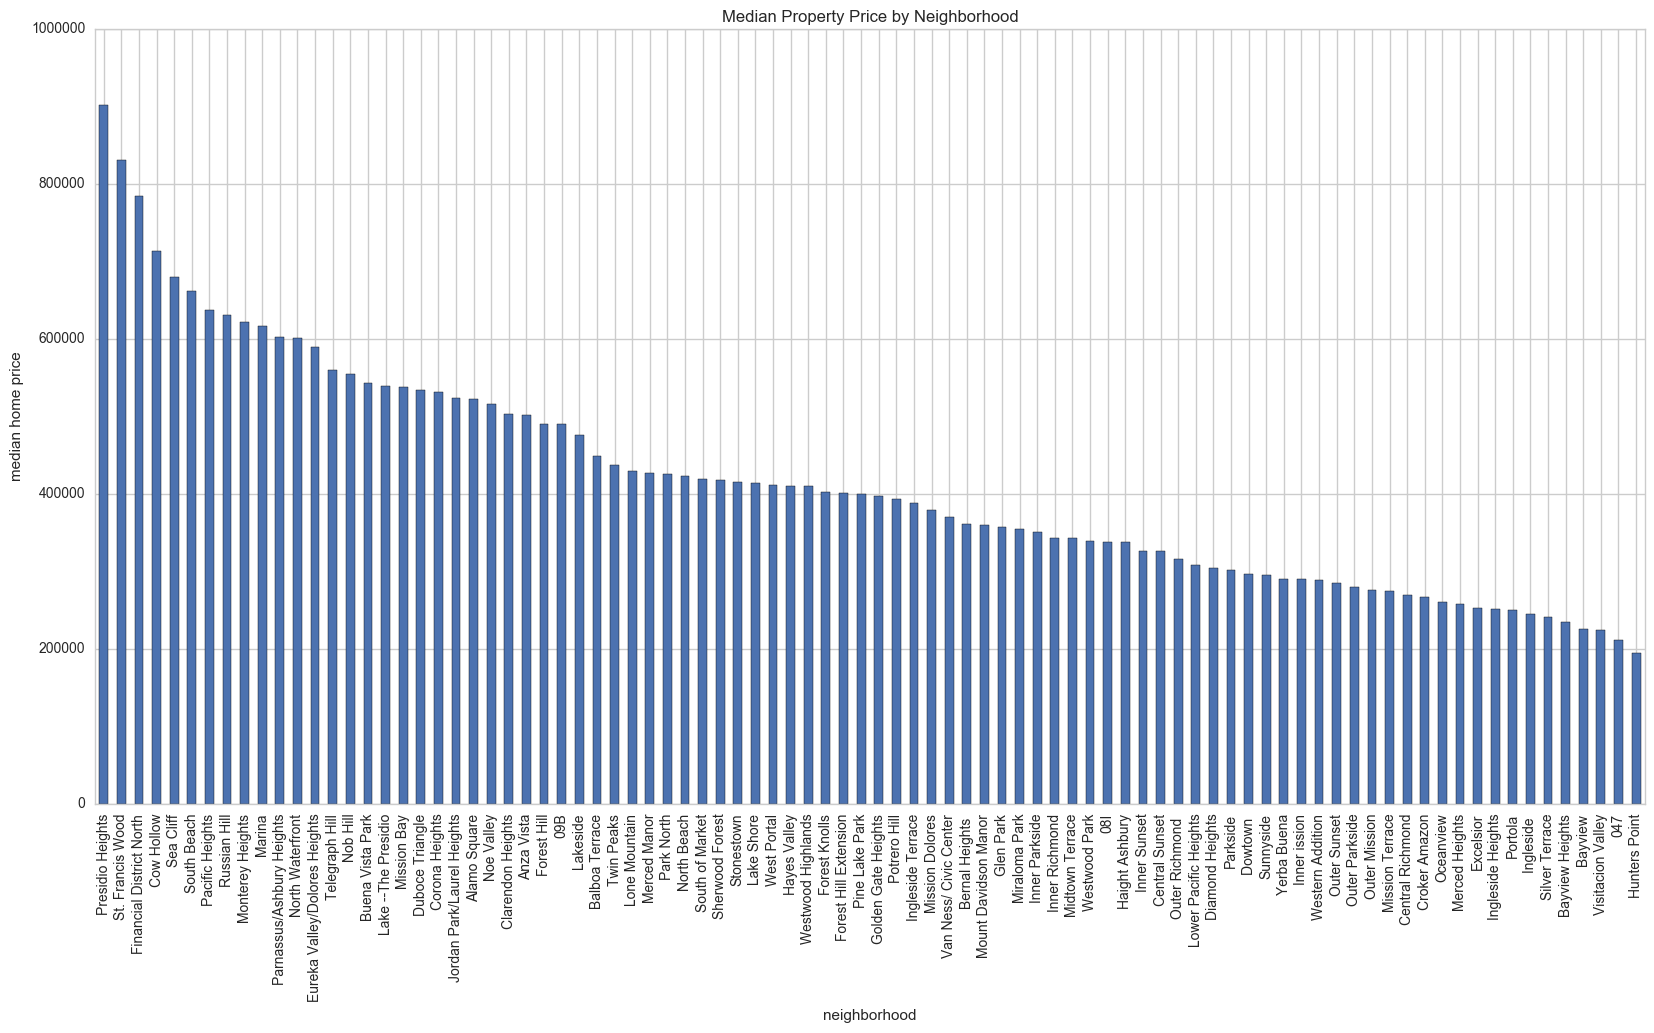

In [12]:
plt.figure(figsize=(20,10))
plt.ylabel('median home price')
plt.title('Median Property Price by Neighborhood')
result.groupby(['neighborhood'])['value'].median().sort_values(ascending=False).plot(kind='bar')

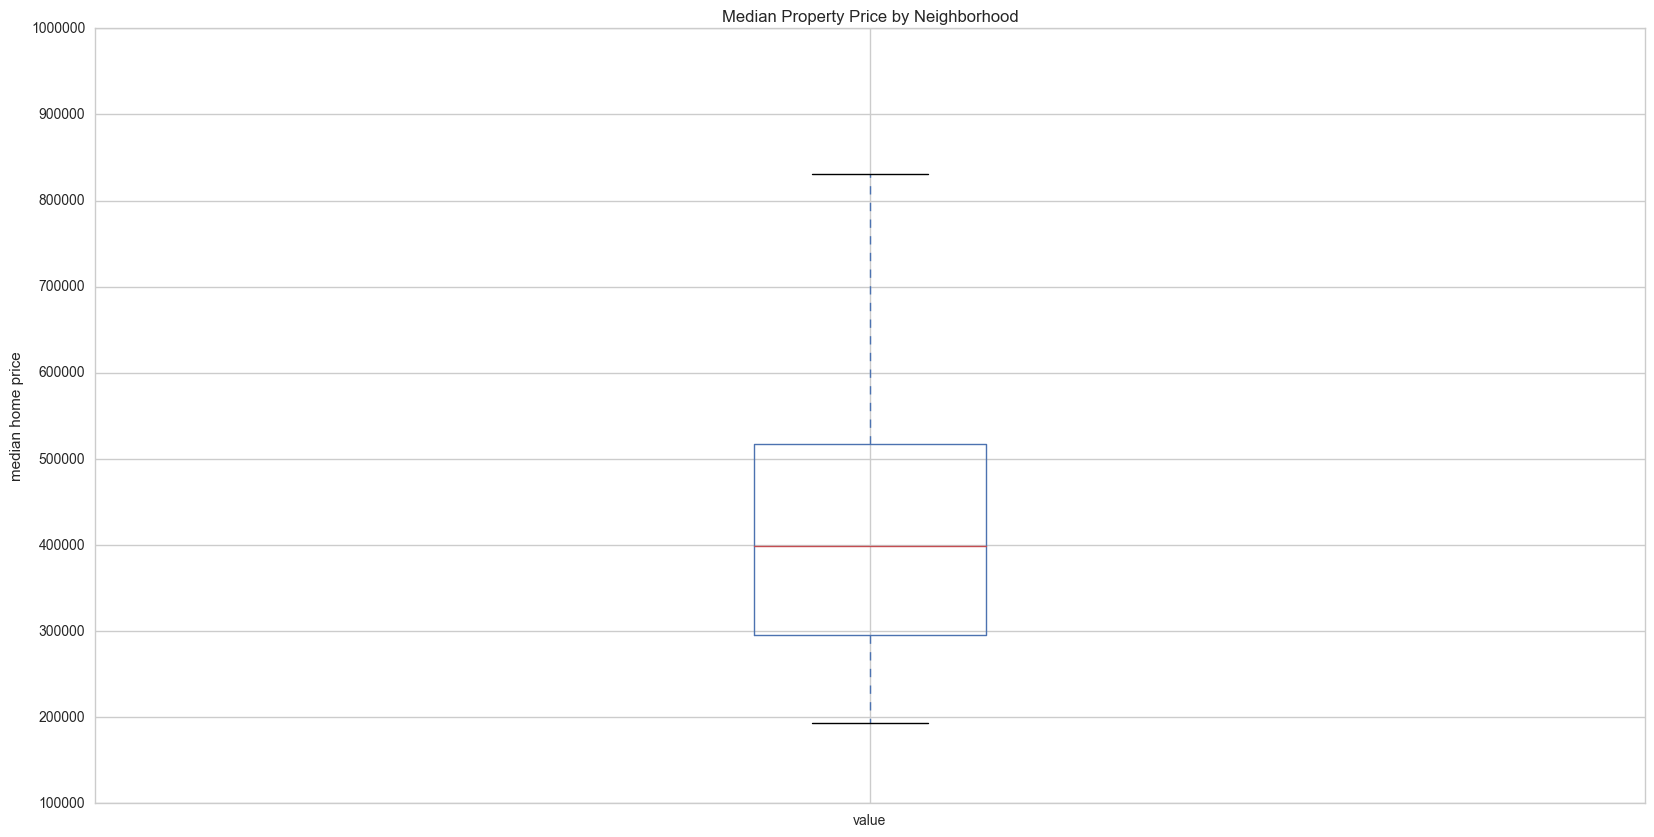

In [13]:
plt.figure(figsize=(20,10))
plt.ylabel('median home price')
plt.title('Median Property Price by Neighborhood')
result.groupby(['neighborhood'])['value'].median().sort_values(ascending=False).plot(kind='box')

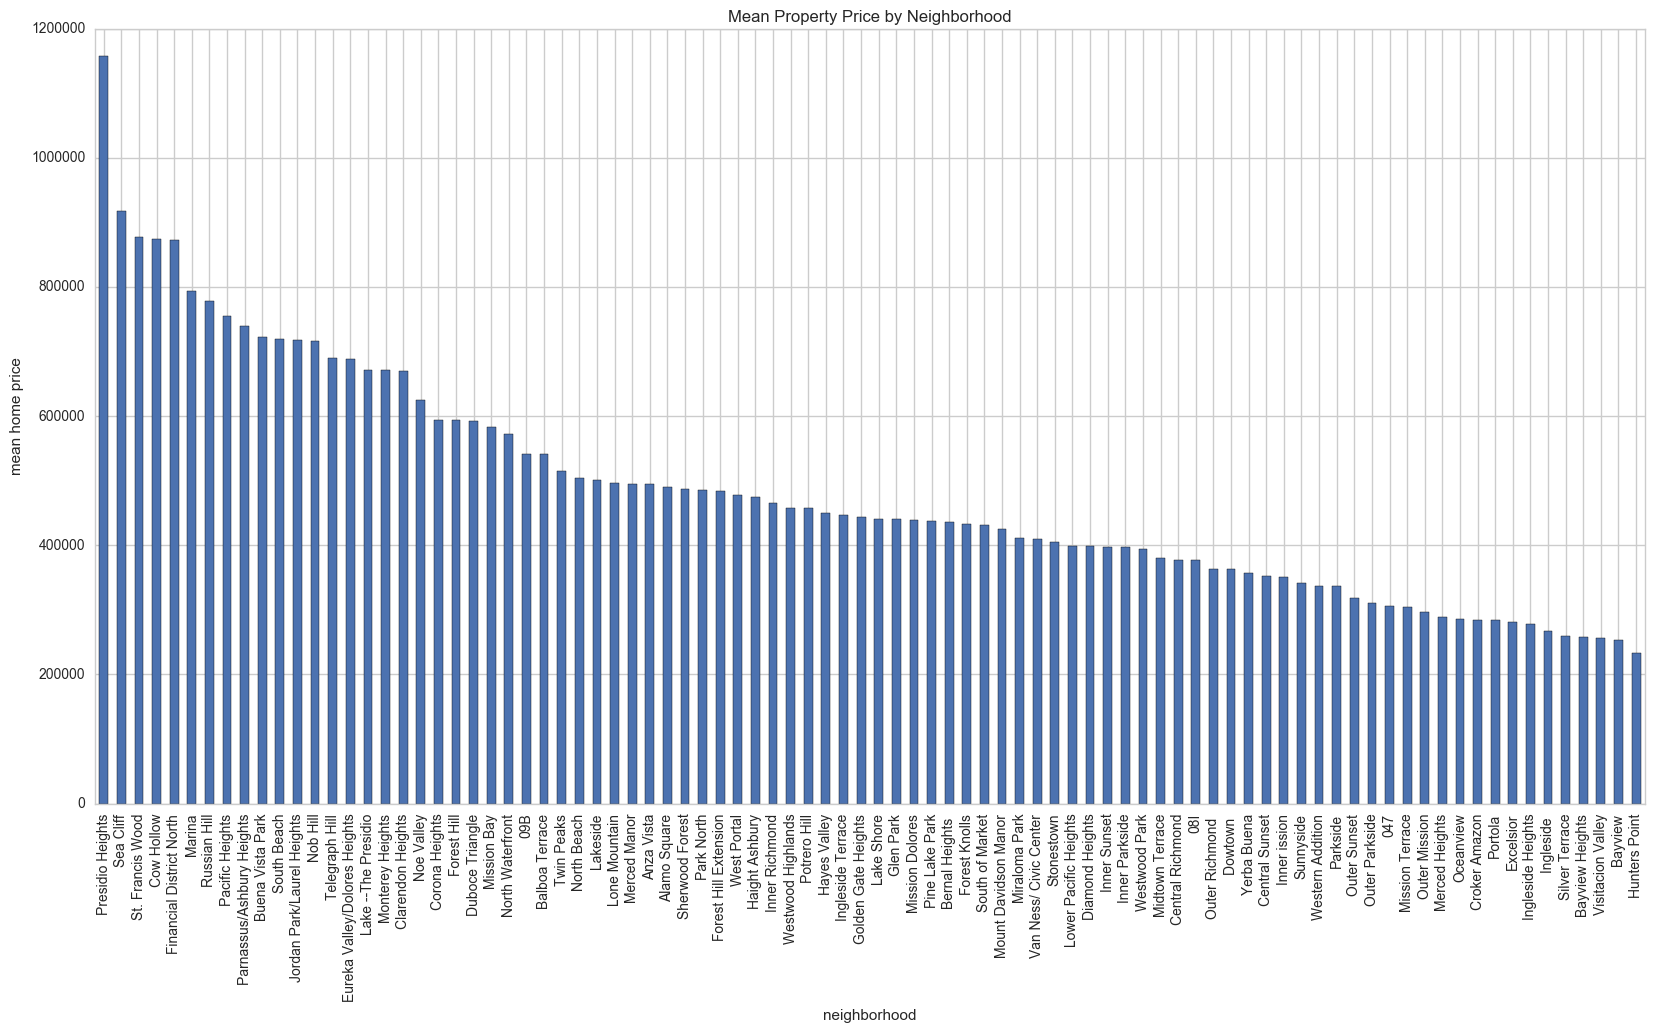

In [14]:
plt.figure(figsize=(20,10))
plt.ylabel('mean home price')
plt.title('Mean Property Price by Neighborhood')
result.groupby(['neighborhood'])['value'].mean().sort_values(ascending=False).plot(kind='bar')

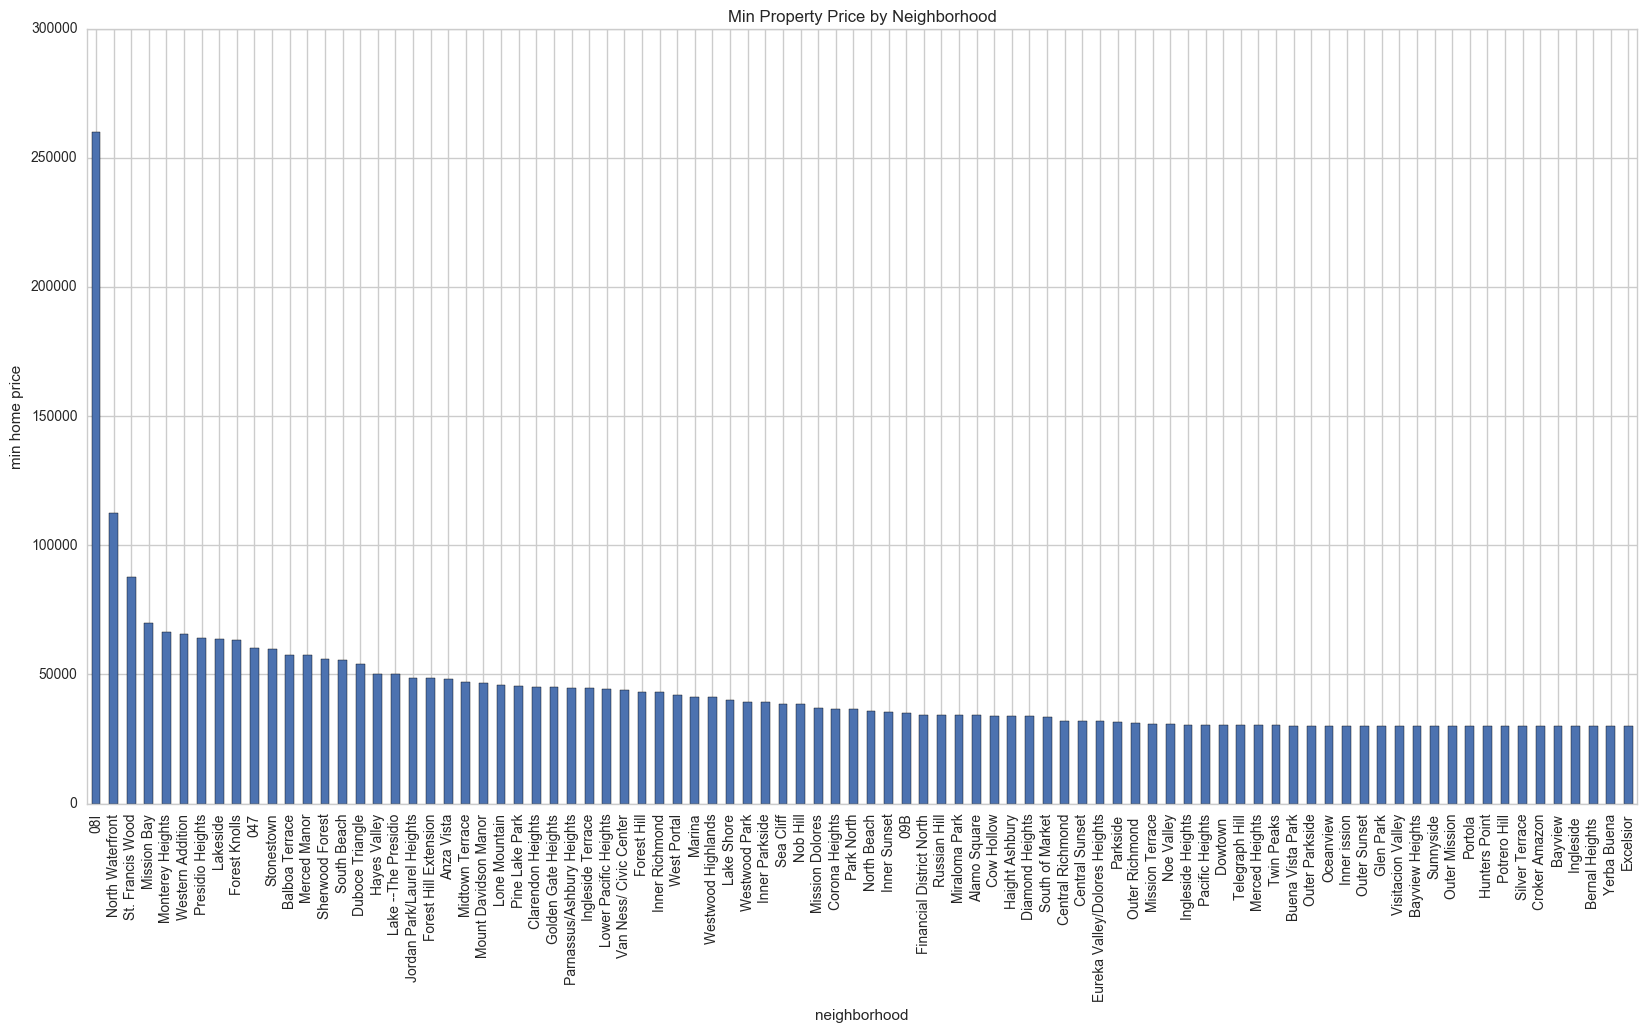

In [15]:
plt.figure(figsize=(20,10))
plt.ylabel('min home price')
plt.title('Min Property Price by Neighborhood')
result.groupby(['neighborhood'])['value'].min().sort_values(ascending=False).plot(kind='bar')

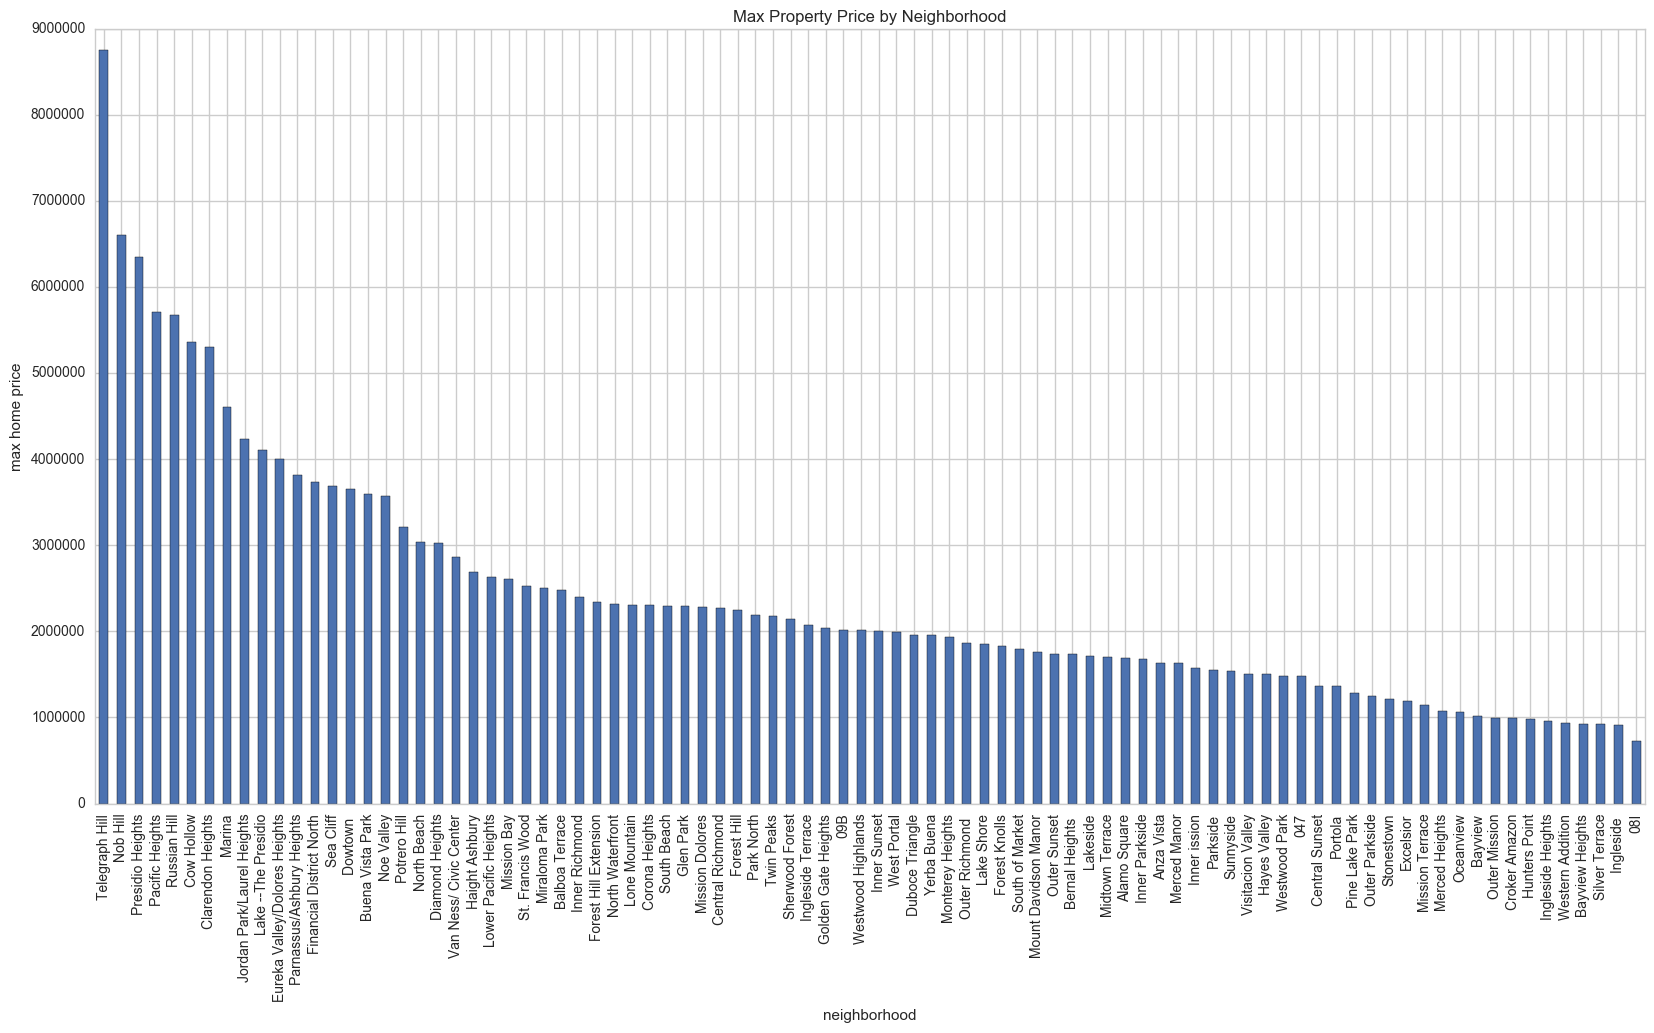

In [16]:
plt.figure(figsize=(20,10))
plt.ylabel('max home price')
plt.title('Max Property Price by Neighborhood')
result.groupby(['neighborhood'])['value'].max().sort_values(ascending=False).plot(kind='bar')

In [17]:
result['neighborhood'].unique()

array(['Russian Hill', 'Telegraph Hill', 'North Beach', 'North Waterfront',
       'Nob Hill', 'Financial District North', 'Dowtown ', '08I', 'Marina',
       'Cow Hollow', 'Pacific Heights', 'Van Ness/ Civic Center',
       'Lower Pacific Heights', 'Western Addition', 'Alamo Square',
       'Hayes Valley', 'Anza Vista', 'Presidio Heights',
       'Jordan Park/Laurel Heights', 'Lone Mountain', 'Park North',
       'Haight Ashbury', 'Buena Vista Park', 'Parnassus/Ashbury Heights',
       'Clarendon Heights', 'Sea Cliff', 'Lake --The Presidio',
       'Outer Richmond ', 'Central Richmond', 'Inner Richmond',
       'Outer Sunset', 'Central Sunset', 'Inner Sunset',
       'Golden Gate Heights', 'Outer Parkside', 'Parkside',
       'Inner Parkside', 'Forest Hill', 'West Portal', 'Pine Lake Park',
       'Duboce Triangle', 'Corona Heights', 'Forest Knolls',
       'Eureka Valley/Dolores Heights', 'Twin Peaks', 'Midtown Terrace',
       'Noe Valley', 'Forest Hill Extension', 'Miraloma Park', 

In [18]:
#Hypothesis: The neighborhood an apartment is in significantly affects its value

In [19]:
neighborhood_dum = pd.get_dummies(result['neighborhood'])

In [20]:
sf = pd.concat([result, neighborhood_dum], axis=1)

In [21]:
######pd.to_csv(sf,'/Users/keatoncarano/Desktop/dsi-sf-7-materials-Keaton/sf_asses_final.csv')


In [22]:
#for i, code in enumerate(key.CODE.values):
   # if len(code) < 3:
        #key.CODE[i] = "0"+key.CODE[i]
#         print i, code
        

In [23]:
#key.CODE.values

In [24]:
#for i, row in key.iterrows():
 #   if len(key.iloc[i,'CODE']) < 3:
  #      key.iloc[i,'CODE'] = "0"+key.iloc[i,'CODE']
   # else:
    #    pass


In [25]:
#key["CODE"] = df.apply(lambda x: "0" + x["CODE"] if len(x["CODE"]) < 3  else x["CODE"], axis=1)


In [26]:
#key.head()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2. Construct and evaluate a linear regression model on the data

---

1. State the variables that are predictors in your linear regression and the target variable.
- Investigate and remove any outliers or other problems in your data. _This is a subjective process._
- Construct a linear regression model.
- Evaluate the model. How does the $R^2$ of the overall model compare to cross-validated $R^2$. What do the differences in $R^2$ mean?
  - Use test / train split
  - Use K-Folds
  - Compare and explain your results with both
- Visualize the evaluation metrics of your analysis in clear charts.
- Summarize your results in the context of your hypothesis. Frame this as if you are presenting to non-technical readers.


In [21]:
import sklearn
print sklearn.__version__

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.cross_validation import cross_val_score, KFold, train_test_split

0.18.1


/Users/keatoncarano/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
y = sf['value']

In [23]:
X = pd.concat([sf.iloc[:,18:], sf[['sqft','year_built', 'beds' ]]], axis=1)

In [24]:
X.columns

Index([u'08I', u'09B', u'Alamo Square', u'Anza Vista', u'Balboa Terrace',
       u'Bayview', u'Bayview Heights', u'Bernal Heights ', u'Buena Vista Park',
       u'Central Richmond', u'Central Sunset', u'Clarendon Heights',
       u'Corona Heights', u'Cow Hollow', u'Croker Amazon', u'Diamond Heights',
       u'Dowtown ', u'Duboce Triangle', u'Eureka Valley/Dolores Heights',
       u'Excelsior', u'Financial District North', u'Forest Hill',
       u'Forest Hill Extension', u'Forest Knolls', u'Glen Park',
       u'Golden Gate Heights', u'Haight Ashbury', u'Hayes Valley',
       u'Hunters Point', u'Ingleside ', u'Ingleside Heights',
       u'Ingleside Terrace', u'Inner Parkside', u'Inner Richmond',
       u'Inner Sunset', u'Inner ission', u'Jordan Park/Laurel Heights',
       u'Lake --The Presidio', u'Lake Shore', u'Lakeside', u'Lone Mountain',
       u'Lower Pacific Heights', u'Marina', u'Merced Heights', u'Merced Manor',
       u'Midtown Terrace', u'Miraloma Park', u'Mission Bay',
       

In [25]:
del X['09B']
del X['08I']

In [26]:
lr = LinearRegression()

In [27]:
lr_scores = cross_val_score(lr, X, y, cv=10, scoring = 'neg_mean_squared_error')

In [28]:
from sklearn.model_selection import KFold

In [29]:
kfold = KFold(n_splits=5,shuffle=True)

0.258489711873 0.255175287845
0.255763977655 0.255850258249
0.249475633325 0.257402333985
0.255038154406 0.256024976744
0.258858587871 0.255082549273


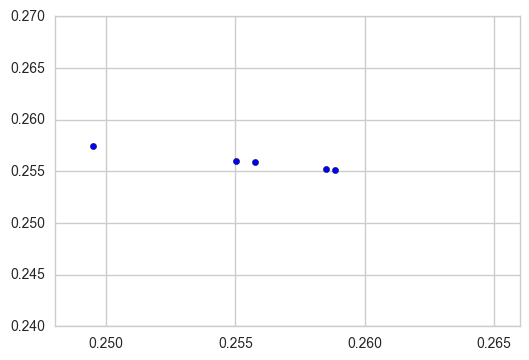

In [30]:
for train, test in kfold.split(X,y):
    Xtrain, ytrain = X.loc[train], y.loc[train]
    Xtest, ytest = X.loc[test], y.loc[test]
    lr = LinearRegression()
    lr.fit(Xtrain,ytrain)
    
    print lr.score(Xtest, ytest), lr.score(Xtrain,ytrain)
    #sklearn poly
    plt.scatter(lr.score(Xtest, ytest), lr.score(Xtrain,ytrain))


This is a very good sign. even though the Rsq value is lower than we would like, all numbers are between .252 and .260 meaning the randomness of the Kfold split is training the dataset consistently. Clearly projecting the algorithm here requires a polynomial regression. 

This shows that square footage and the neighborhood account for roughly 25 percent of the vaiance in the data when using a linear model. I will re run the model using the polynomial preprocessing feature. 

In [37]:
#for train,test in cv_indices:
# X_train  = X.iloc[train]
# First do test and train data sets
# fit train data on lr
# predict test data on lr
#get score for the train
# get score for the test
#check for score, if not in same range, how do we go about optimizing model

In [31]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
r_squared = lr.score(X,y)

In [33]:
lr_scores

array([ -9.61893002e+10,  -1.08266741e+11,  -9.85415160e+10,
        -1.06784918e+11,  -7.51561364e+10,  -1.05843515e+11,
        -1.12583946e+11,  -9.83230197e+10,  -1.19255060e+11,
        -8.91605538e+10])

In [34]:
print "R2", r_squared

R2 0.255872276728


In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:

#for train, test in kfold.split(X,y):
#    Xtrain, ytrain = X.loc[train], y.loc[train]
#    Xtest, ytest = X.loc[test], y.loc[test]
#    pf = PolynomialFeatures(2)
#    pf.fit_transform(Xtrain,ytrain)
#    score = cross_val_score(lr, Xtest, ytest,scoring="neg_mean_squared_error", cv=10)

#    print score

    #sklearn poly

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2.2 Explain $R^2$ vs. mean squared error (MSE)

---

1. If you have negative $R^2$ values in cross-validation, what does this mean? 
2. Why can $R^2$ only be negative when the model is tested on new data?

## Answer
1. R^2 can only be negative if the fit is worse than a horizontal line
2. The fit will only be worse if the data has never been seen before the mode and if the data you are fitting the regression / model to is completely different from the training data. If the model has seen anything like the data before (and certainly the data) it will perform better than a horizontal line. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3. Combine Crime and Fire incidents datasets from the  San Francisco data. Build a Linear regression model to predict number of fire incidents. What are the most significant predictors?

### Evaluate the model with regularized regression.

---

**I recommend having many predictors to see benefits from regularization methods, but it's up to you.**


- Like in part 1, you should state a hypothesis and perform data cleaning and EDA _only_ on the relevant portions of your data. Don't waste time!
- Construct and evaluate different models with cross-validated $R^2$. Compare LinearRegression, Lasso, Ridge, and ElasticNet. 
- Report on which model is best after performing regularization, and why that might be the case (hint: does your data have multicollinearity? Irrelevant variables? Both?)
- Plot visuals that compare the performance of the four models.


In [44]:
fire_path = '/Users/keatoncarano/Desktop/dsi-sf-7-materials-Keaton/datasets/san_francisco/san_francisco/fire_data/fire_incidents.csv'
crime_path = '/Users/keatoncarano/Desktop/dsi-sf-7-materials-Keaton/datasets/san_francisco/san_francisco/sf_crime/sfpd_incidents_from2003.csv'

In [45]:
fire_df = pd.read_csv(fire_path)
fire_df.head()

/Users/keatoncarano/anaconda/envs/dsi/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (11,12,19,44,58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Incident Number,Exposure Number,Address,Incident Date,Call Number,Alarm DtTm,Arrival DtTm,Close DtTm,City,Zipcode,...,Detector Effectiveness,Detector Failure Reason,Automatic Extinguishing System Present,Automatic Extinguishing Sytem Type,Automatic Extinguishing Sytem Perfomance,Automatic Extinguishing Sytem Failure Reason,Number of Sprinkler Heads Operating,Supervisor District,Neighborhood District,Location
0,9030109,0,310 Colon Av.,04/12/2009,91020273,04/12/2009 06:09:13 PM,04/12/2009 06:13:45 PM,04/12/2009 07:23:13 PM,SF,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13067402,0,20 Lansdale Av,07/18/2013,131990117,07/18/2013 10:32:03 AM,07/18/2013 10:37:15 AM,07/18/2013 10:39:55 AM,SF,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12044490,0,7th St. / Folsom St.,05/13/2012,121340051,05/13/2012 03:55:37 AM,05/13/2012 04:01:57 AM,05/13/2012 04:05:44 AM,SF,94103.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,South of Market,"(37.7767460000297, -122.407844)"
3,13033326,0,2799 Pacific Av,04/09/2013,130990286,04/09/2013 04:34:07 PM,04/09/2013 04:39:31 PM,04/09/2013 05:20:27 PM,SF,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11101416,0,Polk St. / Pine St.,11/01/2011,113050357,11/01/2011 06:07:45 PM,11/01/2011 06:10:17 PM,11/01/2011 06:11:09 PM,SF,94109.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Nob Hill,"(37.7896190000297, -122.420497)"


In [46]:
fire_df['Neighborhood  District'].unique()

array([nan, 'South of Market', 'Nob Hill', 'Marina', 'Visitacion Valley',
       'Sunset/Parkside', 'Potrero Hill', 'Presidio Heights',
       'Financial District/South Beach', 'Chinatown', 'West of Twin Peaks',
       'Mission', 'Russian Hill', 'Pacific Heights', 'Excelsior',
       'Tenderloin', 'Bayview Hunters Point', 'Treasure Island',
       'Inner Sunset', 'Portola', 'Lone Mountain/USF',
       'Castro/Upper Market', 'Golden Gate Park', 'Inner Richmond',
       'Hayes Valley', 'North Beach', 'Outer Mission', 'Haight Ashbury',
       'Japantown', 'Lakeshore', 'Twin Peaks', 'Seacliff', 'Noe Valley',
       'Western Addition', 'Oceanview/Merced/Ingleside', 'Outer Richmond',
       'Bernal Heights', 'Mission Bay', 'Lincoln Park', 'Glen Park',
       'Presidio', 'McLaren Park'], dtype=object)

In [47]:
crime_df = pd.read_csv(crime_path)
crime_df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,110914565,WARRANTS,WARRANT ARREST,Friday,05/29/2015,16:42,SOUTHERN,"ARREST, BOOKED",BRYANT ST / 8TH ST,-122.406971,37.772527,"(37.7725273607571, -122.406970988225)",11091456563010
1,11351210,MISSING PERSON,FOUND PERSON,Tuesday,06/14/2016,08:55,BAYVIEW,NONE,1200 Block of 3RD ST,-122.389518,37.772468,"(37.7724682400061, -122.389517648036)",1135121075000
2,120789988,MISSING PERSON,FOUND PERSON,Monday,05/16/2016,00:41,INGLESIDE,NONE,WOOLSEY ST / UNIVERSITY ST,-122.412470,37.722659,"(37.7226585129212, -122.412469643631)",12078998875000
3,140608681,ROBBERY,"ROBBERY, BODILY FORCE",Thursday,06/16/2016,21:00,SOUTHERN,"ARREST, BOOKED",0 Block of UNITEDNATIONS PZ,-122.414318,37.779944,"(37.7799444052046, -122.414317857881)",14060868103074
4,140608681,OTHER OFFENSES,VIOLATION OF MUNICIPAL CODE,Thursday,06/16/2016,21:00,SOUTHERN,"ARREST, BOOKED",0 Block of UNITEDNATIONS PZ,-122.414318,37.779944,"(37.7799444052046, -122.414317857881)",14060868130200


In [48]:
crime_df['X']
crime_df['Y']
del crime_df['PdId']


In [49]:
crime_df['PdDistrict'].unique()

array(['SOUTHERN', 'BAYVIEW', 'INGLESIDE', 'NORTHERN', 'CENTRAL',
       'TARAVAL', 'MISSION', 'PARK', 'TENDERLOIN', 'RICHMOND', nan], dtype=object)

In [50]:
#fire_df = fire_df['Location'].dropna
#fire_df['Location'].unique()

In [51]:
#import gmplot

#gmap = gmplot.GoogleMapPlotter(37.428, -122.145, 16)

#gmap.plot(crime_df['X'], crime_df['Y'], 'cornflowerblue', edge_width=10)
#gmap.scatter(more_lats, more_lngs, '#3B0B39', size=40, marker=False)
#gmap.scatter(marker_lats, marker_lngs, 'k', marker=True)
#gmap.heatmap(heat_lats, heat_lngs)
#gmap.draw("mymap.html")


In [52]:
#pathlon = -117.2974695,-117.2980671,-117.2984607,-117.2979182,-117.2974082,-117.2966604,-117.2977518,-117.2987498,-117.2981491,-117.297708,-117.2972804,-117.2965301,-117.2979485,-117.2975028,-117.2980506,-117.2982983,-117.2976609,-117.2970861,-117.2969908,-117.2981731,-117.2987695,-117.2981146,-117.2976909,-117.2969674,-117.2969299,-117.298394
#pathlat = 33.27172039,33.27197757,33.27217535,33.27225324,33.27218351,33.27233921,33.27242614,33.27248971,33.27268346,33.27265944,33.27263664,33.27279608,33.27281652,33.27194103,33.27176546,33.27224514,33.27222714,33.27208829,33.27237357,33.27243373,33.27262189,33.27268296,33.27265933,33.27262125,33.27282274,33.27283925

#gmap = gmplot.GoogleMapPlotter(pathlat[0],pathlon[0],18)

#gmap.plot(pathlat,pathlon,'cornflowerblue', edge_width=10)

#gmap.draw('map.html')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4. Conduct another analysis using the San Francisco Parks data to predict Park scores

---

1. Combining multiple sources of park data (csv files) is required.
- Perform EDA and cleaning on relevant data.
- Construct and compare different regression models with cross-validation.
- Plot descriptive visuals you think are useful for understanding the data.
- Report on your findings.


In [43]:
pk1 = '/Users/keatoncarano/Desktop/dsi-sf-7-materials-Keaton/datasets/san_francisco/san_francisco/parks/park_donations.csv'
pk2 = '/Users/keatoncarano/Desktop/dsi-sf-7-materials-Keaton/datasets/san_francisco/san_francisco/parks/park_info.csv'
pk3 = '/Users/keatoncarano/Desktop/dsi-sf-7-materials-Keaton/datasets/san_francisco/san_francisco/parks/park_scores.csv'

donations = pd.read_csv(pk1)
info = pd.read_csv(pk2)
score = pd.read_csv(pk3)

In [44]:
donations['Amount'] = donations['Amount'].apply(lambda x: float(x[1:]))

In [45]:
donations['Park'] = 'Unknown'

In [46]:
donations.head()

,Close Date,Account Name,Description,Amount,Type,Park
0,07/08/2014 12:00:00 AM,Glen Park Association,To support botanical signs at the Sunnyside Co...,500.00,Cash,Unknown
1,07/09/2014 12:00:00 AM,USTA NorCAL,To support HITS tennis programming and provide...,2050.00,Cash,Unknown
2,08/21/2014 12:00:00 AM,Walter S. Johnson Foundation,To support grounds maintenance at the Walter S...,5000.00,Cash,Unknown
3,09/04/2014 12:00:00 AM,Kaiser Permanente,To support the Golden Gate Park Senior Center ...,1000.00,Cash,Unknown
4,09/08/2014 12:00:00 AM,San Francisco Parks Alliance (SFPA),To support landscape improvements to Kezar Tri...,1732.08,Cash,Unknown


In [ ]:
#for i, descript in enumerate(donations['Description']):
#        for j, name in enumerate(score['Park']):
#            # j is the index and don is the content
#            if name in descript:
#                donations['Park_Name'][i] = name

/Users/keatoncarano/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [47]:
donations.drop(['Close Date','Account Name', 'Type'], axis=1, inplace=True)

In [48]:
donations.head()


,Description,Amount,Park
0,To support botanical signs at the Sunnyside Co...,500.00,Unknown
1,To support HITS tennis programming and provide...,2050.00,Unknown
2,To support grounds maintenance at the Walter S...,5000.00,Unknown
3,To support the Golden Gate Park Senior Center ...,1000.00,Unknown
4,To support landscape improvements to Kezar Tri...,1732.08,Unknown


In [50]:
donation_amt = donations.groupby(['Park'])['Amount'].sum()

In [51]:
donation_amt

Park
Unknown    6553231.26
Name: Amount, dtype: float64

In [52]:
### would use this but it it died score = pd.merge(score, donation_amt, on=['Park'], how='outer')

ValueError: can not merge DataFrame with instance of type <class 'pandas.core.series.Series'>

In [53]:
score.head()

,ParkID,PSA,Park,FQ,Score
0,86,PSA4,Carl Larsen Park,FY05Q3,0.795
1,13,PSA4,Junipero Serra Playground,FY05Q3,0.957
2,9,PSA4,Rolph Nicol Playground,FY05Q3,0.864
3,117,PSA2,Alamo Square,FY05Q4,0.857
4,60,PSA6,Jose Coronado Playground,FY05Q4,0.859


In [54]:
#result['neighborhood'].replace(key.set_index('CODE')['NEIGHBORHOOD'], inplace=True)

In [55]:
info.drop(0, inplace=True)

In [56]:
score.Park = score.Park.str.upper()
#makes the score park names upper case like the info so we can merge on the park values
score.shape

(5495, 5)

In [57]:
score.head()

,ParkID,PSA,Park,FQ,Score
0,86,PSA4,CARL LARSEN PARK,FY05Q3,0.795
1,13,PSA4,JUNIPERO SERRA PLAYGROUND,FY05Q3,0.957
2,9,PSA4,ROLPH NICOL PLAYGROUND,FY05Q3,0.864
3,117,PSA2,ALAMO SQUARE,FY05Q4,0.857
4,60,PSA6,JOSE CORONADO PLAYGROUND,FY05Q4,0.859


In [58]:
score_avg = score.groupby(['ParkID'], as_index=False)['Score'].mean()
#finds average score for the park based on park ID

In [59]:
score_avg.head()

,ParkID,Score
0,1,0.915485
1,2,1.000000
2,4,0.925576
3,6,0.954545
4,7,0.914758


In [60]:
#parks_score_info = pd.concat([info, score_avg], join='inner')

In [61]:
parks_score_info = pd.merge(info, score_avg, on=['ParkID'], how='inner')

#merges the two data sets on ParkID

In [62]:
parks_score_info.head()

,ParkName,ParkType,ParkServiceArea,PSAManager,email,Number,Zipcode,Acreage,SupDist,ParkID,Location 1,Lat,Score
0,10TH AVE/CLEMENT MINI PARK,Mini Park,PSA 1,"Elder, Steve",steven.elder@sfgov.org,(415) 601-6501,94118.0,0.66,1.0,156.0,"351 9th Ave\nSan Francisco, CA\n(37.78184397, ...",NaN,0.910440
1,24TH/YORK MINI PARK,Mini Park,PSA 6,"Field, Adrian",adrian.field@sfgov.org,(415) 717-2872,94110.0,0.12,9.0,51.0,"24th\nSan Francisco, CA\n(37.75306042, -122.40...",NaN,0.978033
2,29TH/DIAMOND OPEN SPACE,Neighborhood Park or Playground,PSA 5,"O'Brien, Teresa",teresa.o'brien@sfgov.org,(415) 819-2699,94131.0,0.82,8.0,194.0,"Diamond\nSan Francisco, CA\n(37.74360211, -122...",NaN,0.896750
3,ADAM ROGERS PARK,Neighborhood Park or Playground,PSA 3,"Watkins, Robert",robert.watkins@sfgov.org,(415) 819-6138,94124.0,2.74,10.0,46.0,"Ingalls\nSan Francisco, CA\n(37.73101645, -122...",NaN,0.807344
4,ALAMO SQUARE,Neighborhood Park or Playground,PSA 2,"O'Connor, Tom",tom.o'connor@sfgov.org,(415) 218-0259,94117.0,12.70,5.0,117.0,"Hayes\nSan Francisco, CA\n(37.77634875, -122.4...",NaN,0.896548


In [63]:
#df.drop(df.columns[[1, 69]], axis=1, inplace=True)

In [64]:
parks_score_info.drop(['PSAManager', 'email', 'Number','Lat', 'Location 1', 'SupDist'],axis=1, inplace=True)

In [65]:
parks_score_info.dtypes

ParkName            object
ParkType            object
ParkServiceArea     object
Zipcode            float64
Acreage            float64
ParkID             float64
Score              float64
dtype: object

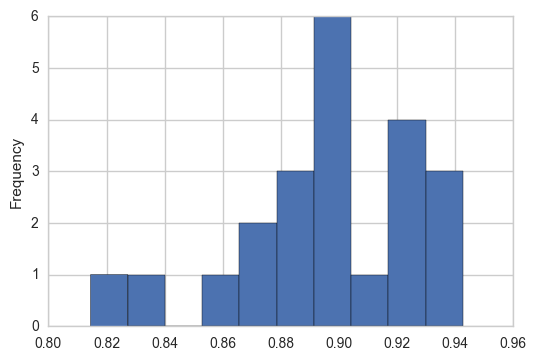

In [66]:
parks_score_info.groupby(['Zipcode'])['Score'].mean().plot(kind='hist')

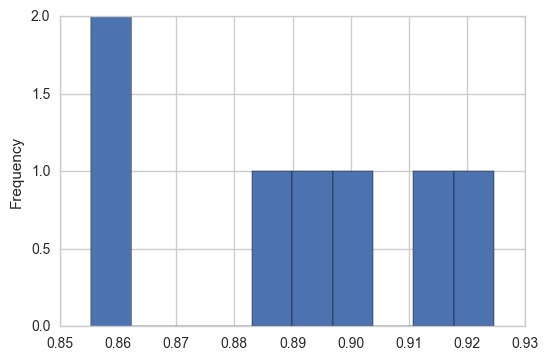

In [67]:
parks_score_info.groupby(['ParkServiceArea'])['Score'].mean().plot(kind='hist')

In [68]:
#get dummies for 
zip_dum = pd.get_dummies(parks_score_info.Zipcode)
park_type_dum = pd.get_dummies(parks_score_info.ParkType)
park_area_dum = pd.get_dummies(parks_score_info.ParkServiceArea)

In [69]:
parks_score_info.drop(['Zipcode','ParkType','ParkServiceArea', 'ParkID'],axis=1, inplace=True)

In [70]:
parks_reg = pd.concat([parks_score_info, zip_dum, park_type_dum, park_area_dum], axis=1)

In [71]:
parks_reg.dtypes

ParkName                            object
Acreage                            float64
Score                              float64
94102.0                            float64
94103.0                            float64
94107.0                            float64
94108.0                            float64
94109.0                            float64
94110.0                            float64
94111.0                            float64
94112.0                            float64
94114.0                            float64
94115.0                            float64
94116.0                            float64
94117.0                            float64
94118.0                            float64
94121.0                            float64
94122.0                            float64
94123.0                            float64
94124.0                            float64
94127.0                            float64
94131.0                            float64
94132.0                            float64
94133.0    

In [72]:
y_p = parks_reg['Score']

In [73]:
X_p = parks_reg.drop(['Score','ParkName'], axis=1)

In [75]:
ss = StandardScaler()

Xn = ss.fit_transform(X_p)

## Dropped all Unecessary columns (anything with dType object was converted to dummy variable and things like Park ID are deleted)

this is preparation for the linear regression

In [76]:
from sklearn.model_selection import train_test_split
Xp_train, Xp_test, yp_train, yp_test = train_test_split(
                                    Xn, y_p, random_state=42, test_size=.20)

In [77]:
alpha = np.linspace(0.0001, 1000,100)
la1 = linear_model.LassoCV(alphas=alpha,cv=10)

In [79]:
model = la1.fit(Xp_train,yp_train)

In [80]:
y_test_hat = model.predict(Xp_test)

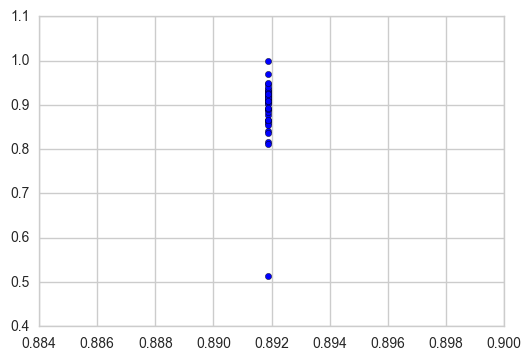

In [81]:
plt.scatter(y_test_hat,yp_test)

-0.217277457891 0.310287208055
0.0716636517457 0.315865874635
-0.0294112199793 0.268400101872
-0.630931862988 0.323208202531
0.209996289013 0.218005943414


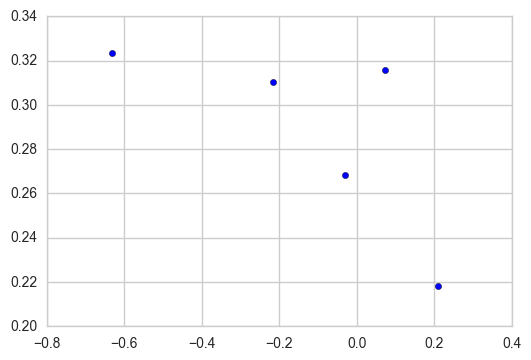

In [78]:
#for train, test in kfold.split(X_p,y_p):
#    Xptrain, yptrain = X_p.loc[train], y_p.loc[train]
#     Xptest, yptest = X_p.loc[test], y_p.loc[test]
#     lr = LinearRegression()
#     lr.fit(Xptrain,yptrain)
    
#     print lr.score(Xptest, yptest), lr.score(Xptrain,yptrain)
#     #sklearn poly
#     plt.scatter(lr.score(Xptest, yptest), lr.score(Xptrain,yptrain))

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Bias-variance tradeoff

---

1. Use a model from any of the previous questions above of your choice and construct a regularized regression model . Ideally the model should actually improve across regularization strengths...
- Gridsearch the regularization parameters to find the optimal.
- Plot the regularization parameter against the cross-validated $R^2$.
- Explain how regularization and regularization strength is related to the bias-variance tradeoff.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Calculate the approximated $\text{bias}^2$ and variance across regularization strengths.

---

You can obviously use my code from the bias-variance lab to do this. 

Plot the bias and variance change _with_ the cross-validated $R^2$. 

You'll need to scale these values somehow to put them on the same chart (I recommend (MinMaxScaler)[http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html] to put $\text{bias}^2$ and variance on the same scale as cross-validated $R^2$.

<img src="http://imgur.com/HNPKfE8.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Custom regularized regression penalties

---

The $\lambda1$ and $\lambda2$ norm regularization penalties (Lasso and Ridge) are the most commonly used regularization penalties. They have a solid foundation in statistics and evidence of effectiveness. However, these are not the only possible penalties for regression – sometimes new, customized penalties give additional performance and predictive power to models depending on the context.


**Devise of and implement a penalized regression for San Francisco Crime data.** What is your rationale – why would this be useful? How does it perform compared to the standard Ridge, Lasso, and Elastic Net penalties?

## Statistics, Biases, and Hypothesis Testing

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Biases 

---
A new food ordering smartphone app incentivizes its users to invite their friends by offering them free orders for each friend that signs up
- What biases are being caused here?
 
- How would you measure the success of such a program?
  
- Rephrase this question to be unbiased:
    ** Many people have said that there is a need for stricter laws on dangerous weapons. Do you agree? ** 
   


## ANSWERS


-1: Here there are going to be biases because there is no clause saying that the friend that signs up has to order. Therefore, I could theoretically sign up 100 friends and get 100 free meals. If you were calculating the profit I bring in by meals ordered, there were be an extremely high bias because my total. additionally if you looked at total users, there would be lower profits per user / profits per order. Essentially there are now a large number of orders that are actually losses for the company

-2: I would measure the success by the number of paid orders per user per month. I additionally would want to see how many orders each newly signed up member places and hope it is on some regular basis (once per week)

-3: Do you believe gun control needs stricker laws?

Rephrasing this question doesnt pressure people one way or another. the initial question implies that the person asking the question believes there is a need for stricter gun control and that the responder will want to please the person asking the question.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Hypothesis Testing 

---

For the health/mortality data from the following website: 
http://assets.datacamp.com/blog_assets/chol.txt'


- Generate summary statistics, histogram plots, cdf plots, and confidence intervals for two columns of your choice and a correlation matrix across all
- Using what you generated, provide short summaries of each column describing the data
- Is there a difference in mortality between smokers, nonsmokers?
- If national average weight is 85 pounds, is our weight average significantly different?
- Until now, we’ve only asked is it different. This is called a two sided test. 
    - What if we want to know if its less than or greater than? This is called a one sided test. We can calculate this from the result of a two sided. You divide your p value in half and check if your t statistic is positive or negative Greater than: p/2 < confidence level and t > 0 and Less-than: p/2 < confidence level and t < 0.
    
    - If national average weight is 85 pounds, is our weight average statistical significantly less?

In [244]:
health = pd.read_csv('http://assets.datacamp.com/blog_assets/chol.txt', sep=" ")

In [245]:
health['MORT'] = health.MORT.apply(lambda x: 1 if x == 'alive' else 0)

In [246]:
health.describe()

,AGE,HEIGHT,WEIGHT,CHOL,MORT
count,200.000000,200.00000,200.000000,200.000000,200.000000
mean,35.715000,172.35000,75.885000,233.600000,0.880000
std,9.604426,6.77399,10.442076,44.766732,0.325777
min,18.000000,156.00000,53.000000,107.000000,0.000000
25%,28.750000,168.00000,68.750000,204.000000,1.000000
50%,37.000000,172.00000,75.000000,232.000000,1.000000
75%,42.000000,176.00000,82.000000,259.000000,1.000000
max,58.000000,191.00000,110.000000,455.000000,1.000000


In [247]:
smoke_dum = pd.get_dummies(health[['SMOKE', 'BLOOD']])

In [248]:
health = pd.concat([health,smoke_dum], axis=1)

In [249]:
health.corr()

,AGE,HEIGHT,WEIGHT,CHOL,MORT,SMOKE_nonsmo,SMOKE_pipe,SMOKE_sigare,BLOOD_a,BLOOD_ab,BLOOD_b,BLOOD_o
AGE,1.000000,-0.274894,0.053034,0.454691,-0.245466,-0.060716,0.010212,0.044086,-0.082376,0.024821,0.090522,0.016701
HEIGHT,-0.274894,1.000000,0.491970,-0.287539,0.066947,-0.082843,0.033246,0.044356,0.060632,-0.088867,-0.013480,-0.023553
WEIGHT,0.053034,0.491970,1.000000,-0.034337,-0.058734,-0.014917,0.125905,-0.090098,0.027748,-0.087398,0.037634,-0.023651
CHOL,0.454691,-0.287539,-0.034337,1.000000,-0.158707,-0.100336,0.102209,0.003058,-0.054456,0.053072,0.024263,0.021901
MORT,-0.245466,0.066947,-0.058734,-0.158707,1.000000,0.067257,0.039287,-0.090223,-0.098857,-0.039421,0.031472,0.090223
SMOKE_nonsmo,-0.060716,-0.082843,-0.014917,-0.100336,0.067257,1.000000,-0.293701,-0.623451,-0.025765,0.057709,0.096976,-0.053579
SMOKE_pipe,0.010212,0.033246,0.125905,0.102209,0.039287,-0.293701,1.000000,-0.564272,-0.005491,-0.003931,-0.024325,0.021940
SMOKE_sigare,0.044086,0.044356,-0.090098,0.003058,-0.090223,-0.623451,-0.564272,1.000000,0.026744,-0.046626,-0.063860,0.028329
BLOOD_a,-0.082376,0.060632,0.027748,-0.054456,-0.098857,-0.025765,-0.005491,0.026744,1.000000,-0.133485,-0.293067,-0.761681
BLOOD_ab,0.024821,-0.088867,-0.087398,0.053072,-0.039421,0.057709,-0.003931,-0.046626,-0.133485,1.000000,-0.056295,-0.146310


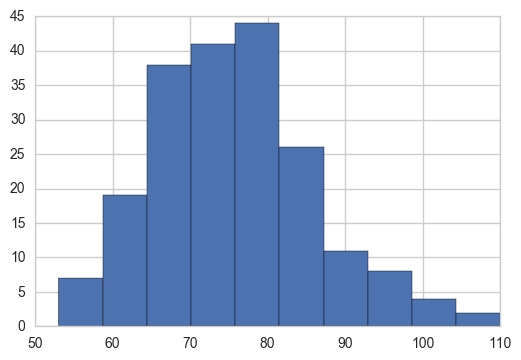

In [250]:
health.WEIGHT.hist()


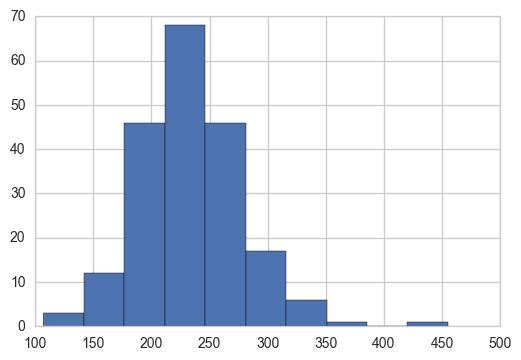

In [251]:
health.CHOL.hist()

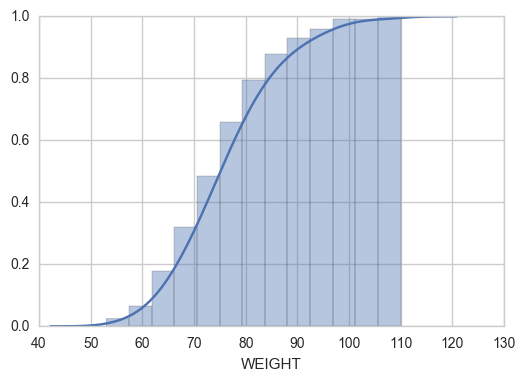

In [252]:
sns.distplot(health.WEIGHT,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

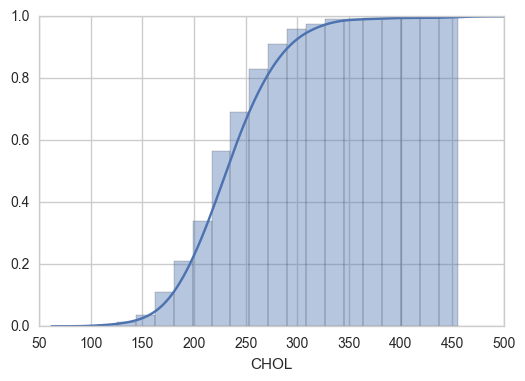

In [253]:
sns.distplot(health.CHOL,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

In [254]:
import numpy as np
import scipy as sp
import scipy.stats



In [255]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return  m-h, m, m+h

In [256]:
mean_confidence_interval(health.CHOL)

(227.3577992004148, 233.59999999999999, 239.84220079958519)

In [257]:
mean_confidence_interval(health.WEIGHT)

(74.428973734623938, 75.885000000000005, 77.341026265376073)

In [258]:
health.head()

,AGE,HEIGHT,WEIGHT,CHOL,SMOKE,BLOOD,MORT,SMOKE_nonsmo,SMOKE_pipe,SMOKE_sigare,BLOOD_a,BLOOD_ab,BLOOD_b,BLOOD_o
0,20,176,77,195,nonsmo,b,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,53,167,56,250,sigare,o,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,44,170,80,304,sigare,a,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,37,173,89,178,nonsmo,o,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,26,170,71,206,sigare,o,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0


Age is the average age in this sample of men, height is the height of the person in centimeters, weight is the weight of the person in Kilo's. Cholesterol is their cholesterol score. Smoke is defines what type of smoker they are 'non' 'pipe', or cigare(guessing this includes cigarettes). I made these into dummy variables. Blood is the blood type of the person adn mortality has been converted into 1 for alive and 0 for dead.

In [259]:
health.groupby(['SMOKE'])['MORT'].mean()

SMOKE
nonsmo    0.918367
pipe      0.904762
sigare    0.853211
Name: MORT, dtype: float64

In [260]:
from scipy.stats import ttest_ind

non_sm = health[health['SMOKE']=='nonsmo']
sm = health[health['SMOKE']!='nonsmo']

ttest_ind(non_sm['MORT'], sm['MORT'], equal_var=False)

Ttest_indResult(statistic=1.053253450195184, pvalue=0.29478845575705775)

With a P value as 0.295, we cannot reject the null hypothesis that there is a difference in mortality rates between smokers and non smokers.

In [261]:
from scipy.stats import ttest_1samp

weight = health["WEIGHT"]

ttest_1samp(weight, 85)


Ttest_1sampResult(statistic=-12.344821194685455, pvalue=2.2901936138582111e-26)

With such an incredibly low pvalue, we will reject the null hypothesis that the weights are the same in favor of the alternate hypothesis that the weights are different. You can see from the cdf above that according to this sample, 85 (Kilos) is the heaviset 20% of the sample while the sample mean is much closer to 75 Kilos. It is also very obviously less.